In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
import pandas as pd
df = pd.read_csv('ChurnData.csv')
print(df.head())

In [4]:
X = df.drop('churn', axis=1) 
y = df['churn']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [11]:
model = LogisticRegression()
model.fit(X_train, Y_train)

e:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
pred_prob = model.predict_proba(X_test)

In [15]:
fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:, 1], pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [16]:
auc_score = roc_auc_score(Y_test, pred_prob[:, 1])
print("AUC score = ", auc_score)

AUC score =  0.7642045454545454


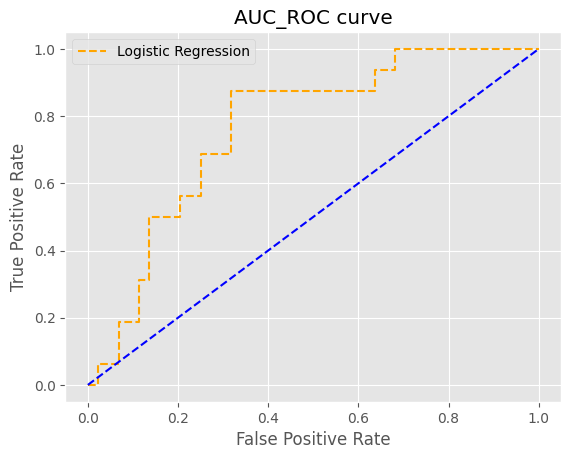

In [17]:
plt.style.use('ggplot')

plt.plot(fpr, tpr, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('AUC_ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()